# Importing Libraries:

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis

# Loading Dataset:

In [51]:
# Using pandas 'read_csv' function to read the csv file
df = pd.read_csv('IRIS.csv')
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


# Exploring Dataset:

In [52]:
df.info() # using info function to print details of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [53]:
# The above information shows that the dataset has 150 entries (rows) and 5 columns
# Dataset have categorical, and numeric columns both

# Null Values:

In [54]:
df.isnull().sum() # Using isnull

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [55]:
# The above information shows that the dataset has not null values.

# Exploring Duplicates:

In [56]:
# Using duplicated function to explore the duplicate entries and
# it is showing that the dataset has 3 duplicate entries
df.duplicated().sum()

3

In [57]:
df.drop_duplicates(inplace=True)

# Exploring Statistical Information:

In [58]:
df.describe().T # Using describe function to understand statistics of dataset

,count,mean,std,min,25%,50%,75%,max
sepal_length,147.0,5.856463,0.829100,4.3,5.1,5.8,6.4,7.9
sepal_width,147.0,3.055782,0.437009,2.0,2.8,3.0,3.3,4.4
petal_length,147.0,3.780272,1.759111,1.0,1.6,4.4,5.1,6.9
petal_width,147.0,1.208844,0.757874,0.1,0.3,1.3,1.8,2.5


In [59]:
# the above statistics shows that the 50% flowers have sepal length 5.8, and width 3.0
# the 50% flowers have petal length 4.4, and width 1.3

In [60]:
numerical_df = df.select_dtypes(include=['int', 'float']) # Extracting numerical columns for label encoding
numerical_columns = numerical_df.columns

In [61]:
from scipy.stats import kurtosis, skew

# Calculate mean, median, standard deviation, skewness, and kurtosis for each numeric column
statistics = {
    'Mean': numerical_df.mean(),
    'Median': numerical_df.median(),
    'Standard Deviation': numerical_df.std(),
    'Skewness': numerical_df.apply(skew),
    'Kurtosis': numerical_df.apply(kurtosis)
}

# Convert statistics to a DataFrame for plotting
statistics_df = pd.DataFrame(statistics)
print(statistics_df)


                  Mean  Median  Standard Deviation  Skewness  Kurtosis
sepal_length  5.856463     5.8            0.829100  0.289566 -0.578732
sepal_width   3.055782     3.0            0.437009  0.321031  0.197982
petal_length  3.780272     4.4            1.759111 -0.290757 -1.368695
petal_width   1.208844     1.3            0.757874 -0.112317 -1.313904


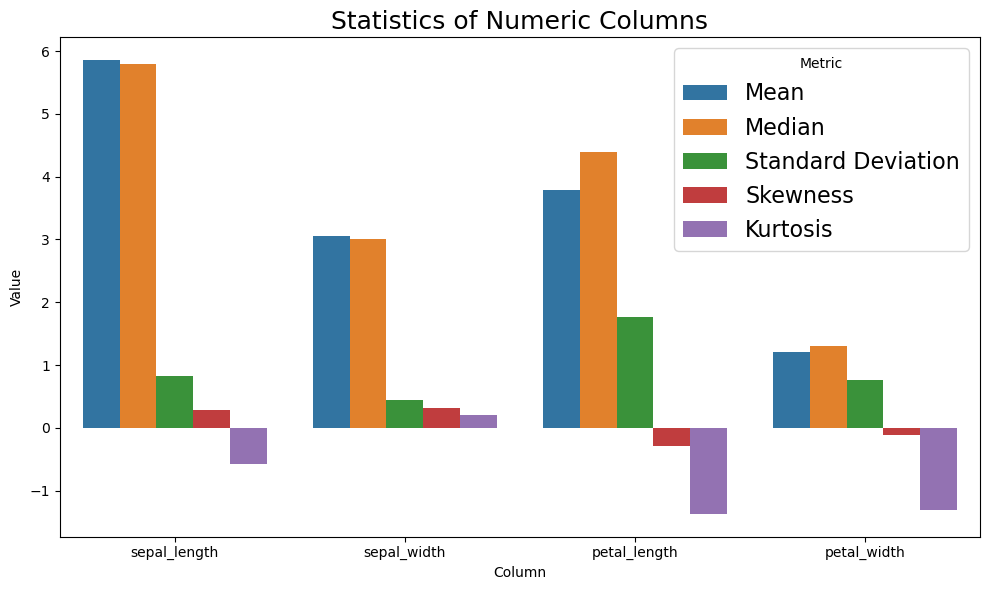

<Figure size 640x480 with 0 Axes>

In [62]:
# Reset index to turn the index into a column
statistics_df.reset_index(inplace=True)

# Melt the DataFrame
melted_df = statistics_df.melt(id_vars='index', var_name='Statistic', value_name='Value')

# Plot the statistics
plt.figure(figsize=(10, 6))
sns.barplot(x='index', y='Value', hue='Statistic', data=melted_df)
plt.title('Statistics of Numeric Columns', fontsize= 18)
plt.xlabel('Column')
plt.ylabel('Value')
plt.xticks()
plt.legend(title='Metric', fontsize=16)
plt.tight_layout()
plt.show()
plt.savefig('stats.jpg')

# Visualization:

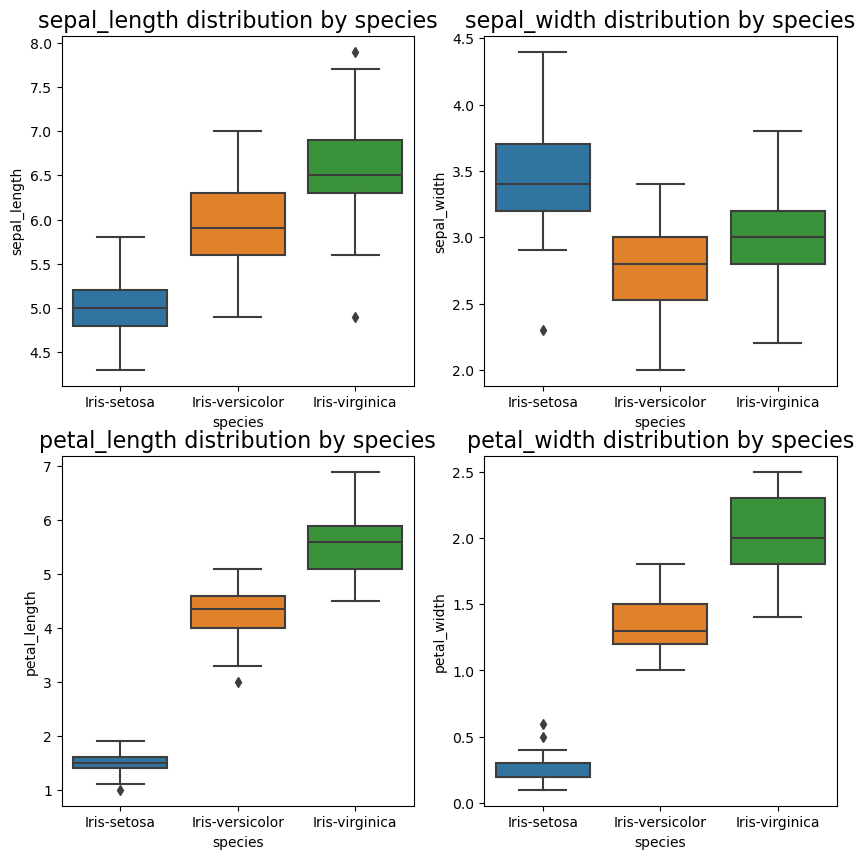

In [63]:
# box plot
def boxPlot(y):
    sns.boxplot(x="species", y=y, data=df)


plt.figure(figsize=(10,10))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    boxPlot(column)
    plt.title(f'{column} distribution by species', fontsize=16)
plt.show()

In [65]:
# count_plot
def count_plot(y, title, font_size=12 ):
  ''' function take x and y axis values and will plot a count plot'''
  sns.countplot(y=y,data=df)
  plt.title(title, fontsize=20)
  plt.grid(True)
  plt.show()
  plt.savefig('countplot.png')

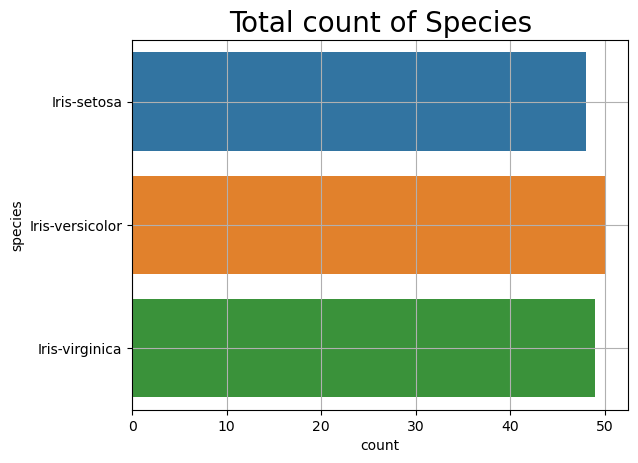

<Figure size 640x480 with 0 Axes>

In [66]:
count_plot(df['species'], 'Total count of Species')

# Label Encoding:

In [67]:
categorical_df = df.select_dtypes(include=['object', 'category']) # Extracting categorical columns for label encoding
categorical_columns = categorical_df.columns

In [68]:
from sklearn.preprocessing import LabelEncoder

# Assuming df is  dataframe with categorical columns
label_encoder = LabelEncoder()
encoded_df = df.copy()

for col in categorical_columns:
    encoded_df[col] = label_encoder.fit_transform(df[col])

# Correlation:

In [69]:
corr = encoded_df.corr() # Now find correlation between features using corr( ) functions
corr

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109321,0.871305,0.817058,0.782904
sepal_width,-0.109321,1.000000,-0.421057,-0.356376,-0.418348
petal_length,0.871305,-0.421057,1.000000,0.961883,0.948339
petal_width,0.817058,-0.356376,0.961883,1.000000,0.955693
species,0.782904,-0.418348,0.948339,0.955693,1.000000


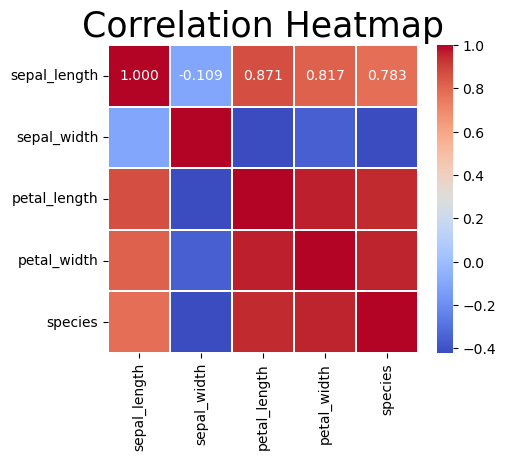

In [70]:
correlation_matrix = encoded_df.corr()
# Plotting heatmap for viualising correlation
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f", linewidths=0.2)
plt.title('Correlation Heatmap', fontsize=25)
plt.savefig('correlation heatmap.png')
plt.show()


In [71]:
features = df.drop('species', axis=1)

# Scaling:

In [72]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(features)
df_scaled

array([[-0.91550949,  1.0199714 , -1.35773692, -1.33570001],
       [-1.15755966, -0.12808217, -1.35773692, -1.33570001],
       [-1.39960983,  0.33113926, -1.41477817, -1.33570001],
       [-1.52063491,  0.10152855, -1.30069567, -1.33570001],
       [-1.03653457,  1.24958212, -1.35773692, -1.33570001],
       [-0.55243423,  1.93841426, -1.18661318, -1.07090176],
       [-1.52063491,  0.79036069, -1.35773692, -1.20330089],
       [-1.03653457,  0.79036069, -1.30069567, -1.33570001],
       [-1.76268509, -0.35769288, -1.35773692, -1.33570001],
       [-1.15755966,  0.10152855, -1.30069567, -1.46809914],
       [-0.55243423,  1.47919283, -1.30069567, -1.33570001],
       [-1.27858474,  0.79036069, -1.24365442, -1.33570001],
       [-1.27858474, -0.12808217, -1.35773692, -1.46809914],
       [-1.88371017, -0.12808217, -1.52886066, -1.46809914],
       [-0.06833389,  2.16802498, -1.47181942, -1.33570001],
       [-0.18935898,  3.08646783, -1.30069567, -1.07090176],
       [-0.55243423,  1.

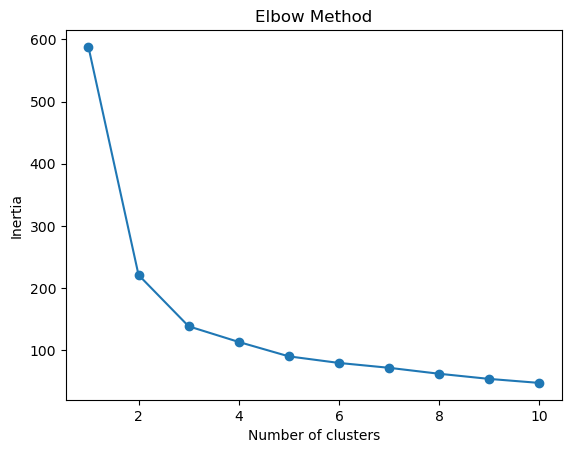

In [73]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# List to store inertia values for different number of clusters
inertia_values = []

# Loop through different values of k
for k in range(1, 11):
    # Initialize KMeans with current value of k
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=500, n_init=10, random_state=0)

    # Fit KMeans to the scaled data
    kmeans.fit(df_scaled)  # Using df_scaled is  scaled data

    # Append the inertia value (sum of squared distances of samples to their closest cluster center)
    inertia_values.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

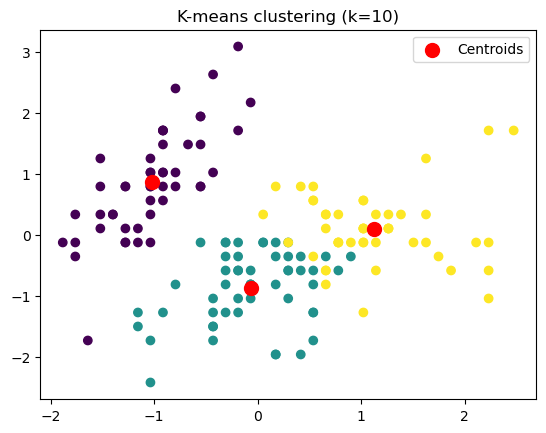

In [74]:
	kmeans = KMeans(n_clusters=3, init='k-means++',max_iter=500, n_init=10, random_state=0)
	y_kmeans = kmeans.fit_predict(df_scaled)
	inertia_values.append(kmeans.inertia_)
	plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=y_kmeans)
	plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1], s=100, c='red', label='Centroids')
	plt.title('K-means clustering (k={})'.format(k))
	plt.legend()
	plt.show()

# Predicting Petal Length by Sepal Length:

# Line Fitting:

In [75]:
X_feature = df[['sepal_length']]
y_feature = encoded_df[['petal_length']]

In [76]:
x = scaler.fit_transform(X_feature)
y = scaler.fit_transform(y_feature)

# Linear Regression with sklearn:

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

 #Independent variables
XY = pd.DataFrame(x)
# Dependent variable
Z = y
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(XY, Z, test_size=0.2, random_state=42)
# Perform multiple linear regression
mlr = LinearRegression()
# Fit the model
mlr.fit(X_train, y_train)

# Predict on test data
y_pred = mlr.predict(X_test)

print(mlr.coef_)

# Get the coefficients
β1 = mlr.coef_[0][0]
# Get the intercept
α = mlr.intercept_

print(α)

[[0.88884447]]
[-0.02591541]


In [78]:
from scipy import stats as st
# Re-format the results of the linear regression
params = np.append(mlr.coef_, mlr.intercept_)
# Use the model to predict other output values
predictions = mlr.predict(X_test)
# Sum of squared residuals
sum_sq_residuals = sum((y_test - predictions)**2)
# Degrees of freedom (sample size - number of parameters)
dof = len(y_train) - len(params)
# Mean squared error
mse = sum_sq_residuals / dof
# Add a constant
X_train['Constant'] = 1
# Covariances of the parameters ('@'' is the dot product)
cov = mse * np.diagonal(np.linalg.inv(X_train.T @ X_train))
# Standard errors of the parameters
se = np.sqrt(cov)
# t-statistics associated with the parameters
t_statistics = params / se
# Two-tailed test
tails = 2
# Calculate the p-values
p_values = [tails * (1 - st.t.cdf(np.abs(t), dof)) for t in t_statistics]
# Significance level
alpha = 0.05
# Percent-point function (aka quantile function) of the t-distribution
t = st.t.ppf(1 - (alpha / tails), dof)
# Margin of error
d = t * se
# 95% confidence interval
upper_ci = params + d
lower_ci = params - d

In [79]:
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 200)

# Display the results
output = [params, se, t_statistics, np.array(p_values), lower_ci, upper_ci]
index = ['Value', 'Standard Error', 't-Statistic', 'p-Value', 'Lower CI', 'Upper CI']
output = pd.DataFrame(output, index=index, columns=list(X_train)).round(3)
output = output.T
print(output)

          Value  Standard Error  t-Statistic  p-Value  Lower CI  Upper CI
0         0.889           0.025       35.337    0.000     0.839     0.939
Constant -0.026           0.025       -1.039    0.301    -0.075     0.024


# Confidence Interval Plot Using Seaborn library:

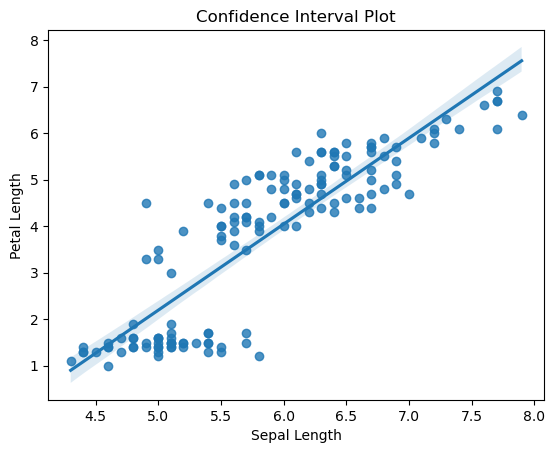

In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Plot regplot using seaborn
sns.regplot(x='sepal_length', y='petal_length', data=df)
plt.title('Confidence Interval Plot')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.show()

R-squared: 0.71


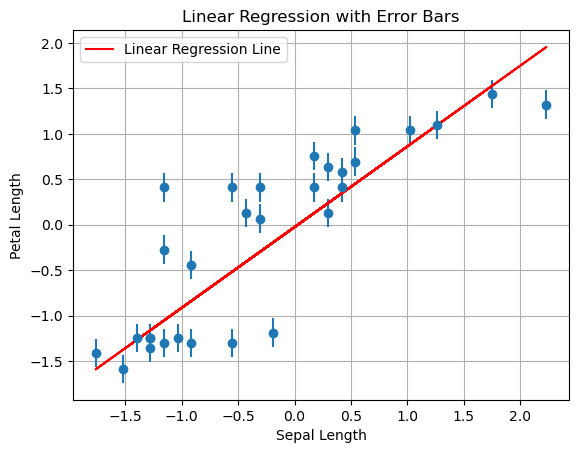

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Calculate confidence interval
confidence = 0.95
squared_errors = (y_pred - y_test) ** 2
mse = np.mean(squared_errors)
std_dev = np.std(squared_errors)
margin_of_error = 1.96 * (std_dev / np.sqrt(len(y_pred)))
confidence_interval = (mse - margin_of_error, mse + margin_of_error)
# Generate random indices to select 20 values
random_indices = np.random.choice(np.arange(3000), size=20, replace=False)
# Plot data points with error bars

plt.errorbar(X_test.flatten(), y_test.flatten(), yerr=margin_of_error, fmt='o', )

# Plot linear regression line
plt.plot(X_test, y_pred, color='red', label='Linear Regression Line')

# # Calculate and display R-squared value
r_squared = model.score(X_test, y_test)
print(f'R-squared: {r_squared:.2f}')

plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Linear Regression with Error Bars')
plt.legend()
plt.grid(True)
plt.show()
